# Bangladeshi_Currency_Detection_for_blind_people_with_voice

# Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download Dataset from Drive
!cp '/content/drive/MyDrive/Dataset/Money.zip' Money.zip

cp: cannot stat '/content/drive/MyDrive/Dataset/Money.zip': No such file or directory


In [ ]:
# List 
!ls

drive  Money.zip  sample_data


In [ ]:
# Unzip File
from zipfile import ZipFile
file_name = "Money.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
# Define Train and Test Path
train_dir = '/content/drive/MyDrive/thesis_dataset_all/training_set'
val_dir = '/content/drive/MyDrive/thesis_dataset_all/test_set'

In [ ]:
# Import Necessary Libraries
import numpy as np
import cv2
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam

from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot as plt

In [ ]:
# Train and Test Generator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224,224),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224,224),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 213 images belonging to 6 classes.


In [ ]:
# Download ResNet50 Pretrained Model
base_model = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights="imagenet")

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# Sequential Model and Add ResNet50 Model
obj_model = Sequential()
obj_model.add(base_model)
obj_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3), data_format='channels_last'))
obj_model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
obj_model.add(MaxPooling2D(pool_size=(2, 2)))
obj_model.add(Dropout(0.25))
obj_model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
obj_model.add(MaxPooling2D(pool_size=(2, 2), padding='same',))
obj_model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
obj_model.add(MaxPooling2D(pool_size=(2, 2), padding='same',))
obj_model.add(Dropout(0.25))
obj_model.add(Flatten())
obj_model.add(Dense(1024, activation='relu'))
obj_model.add(Dropout(0.5))
obj_model.add(Dense(6, activation='softmax'))

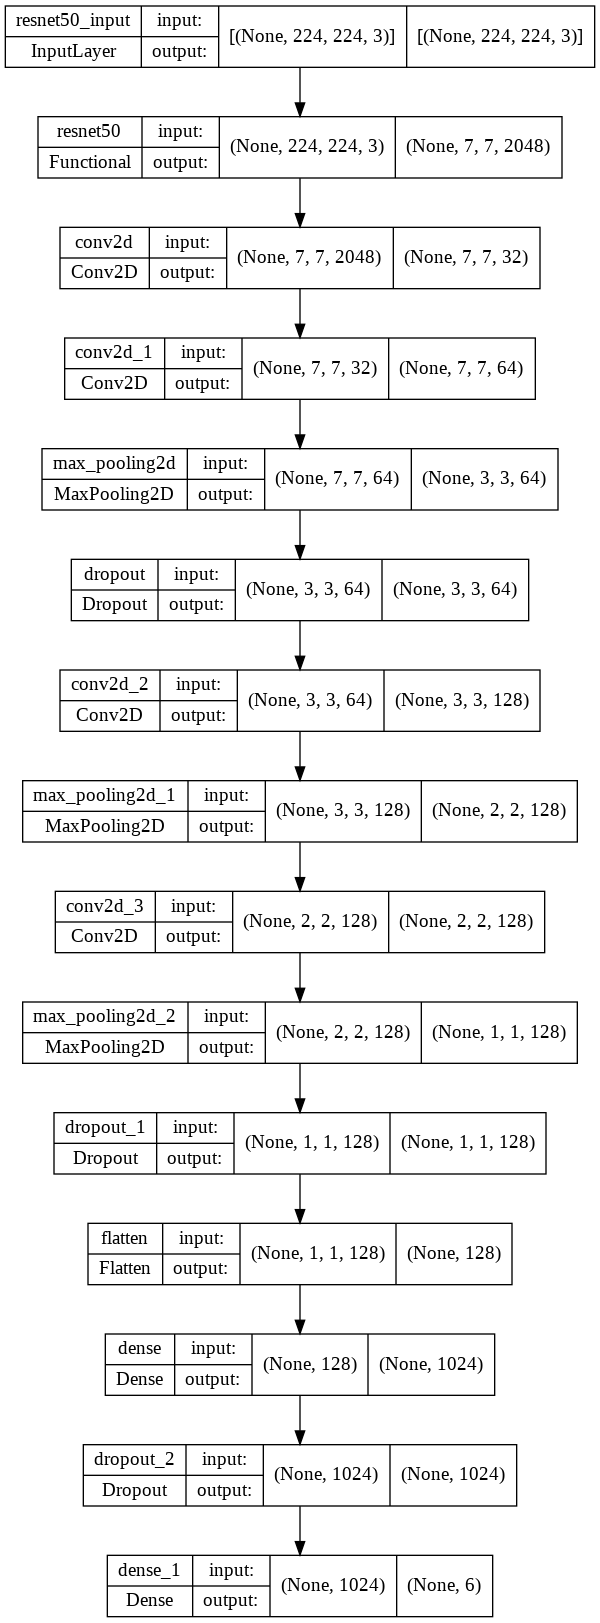

In [ ]:
# Show Model
plot_model(obj_model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Summary Model
obj_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 32)          589856    
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                        

In [ ]:
# Compile Model
obj_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit Generation
obj_model_info = obj_model.fit_generator(
        train_generator,
        steps_per_epoch=594 // 64,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=213 // 64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/2
9/9 [==============================] - 318s 35s/step - loss: 0.4977 - accuracy: 0.2736 - val_loss: 0.4395 - val_accuracy: 0.3646
Epoch 2/2
9/9 [==============================] - 18s 2s/step - loss: 0.3606 - accuracy: 0.4377 - val_loss: 0.4428 - val_accuracy: 0.3542


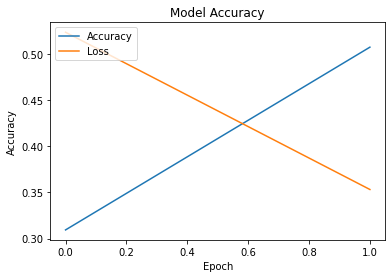

In [ ]:
# Line Graph for Accuracy and Loss
plt.plot(obj_model_info.history['accuracy'])
plt.plot(obj_model_info.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Accuracy","Loss"],loc='upper left')
plt.show()

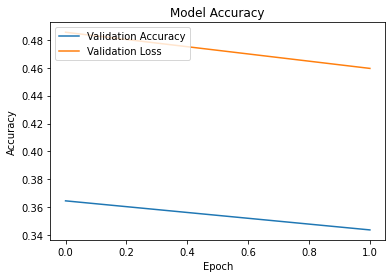

In [ ]:
# Line Graph for Validation Accuracy and Validation Loss
plt.plot(obj_model_info.history['val_accuracy'])
plt.plot(obj_model_info.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Validation Accuracy","Validation Loss"],loc='upper left')
plt.show()

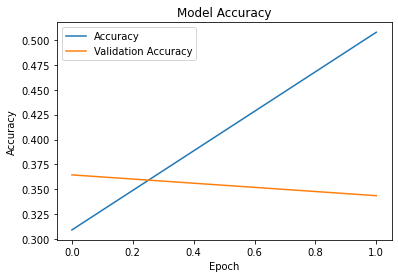

In [ ]:
# Line Graph for Accuracy and Validation Accuracy
plt.plot(obj_model_info.history['accuracy'])
plt.plot(obj_model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Accuracy","Validation Accuracy"],loc='upper left')
plt.show()

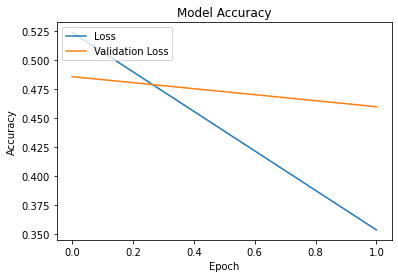

In [ ]:
# Line Graph for Loss and Validation Loss
plt.plot(obj_model_info.history['loss'])
plt.plot(obj_model_info.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Loss","Validation Loss"],loc='upper left')
plt.show()

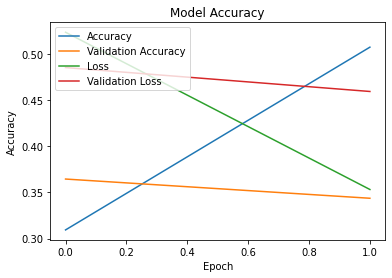

In [ ]:
# Line Graph for Accuracy, Loss, Validation Accuracy and Validation Loss
plt.plot(obj_model_info.history['accuracy'])
plt.plot(obj_model_info.history['val_accuracy'])
plt.plot(obj_model_info.history['loss'])
plt.plot(obj_model_info.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"],loc='upper left')
plt.show()

In [ ]:
#Saving the model
obj_model.save('currency_detection_model.h5')

# Testing

In [ ]:
# Load Model
from keras.models import load_model
obj_model = load_model('currency_detection_model.h5')

In [ ]:
# Install Library
!pip install pyttsx3
!pip install gTTS

In [ ]:
# Import Necessary Library 
import pandas as pd
import pyttsx3
from gtts import gTTS
from IPython.display import Audio
from gtts import gTTS
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define Objects
def obj_analysis(obj):
    objects = ('Leprosy in cat','Leprosy in dog','dog ringworm','ear mites','fungal infection', 'mange')
    a=objects[obj]
    print(a)
    #tts = gTTS(a)
    #tts.save('voice_output.wav')
    return a

# Test 1

Leprosy in dog


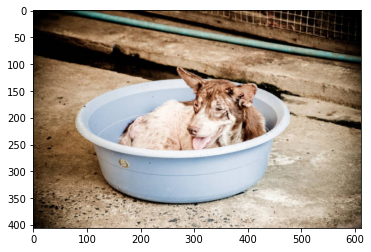

In [ ]:
# Prediction Function
file = '/content/w (1).jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = obj_model.predict(x)
maxVal_Index = np.argmax(custom)

a=obj_analysis(maxVal_Index)

x = np.array(x, 'float32')
x = x.reshape([224, 672]);

plt.imshow(true_image)
plt.show()

In [ ]:
# Voice output
sound_file = 'voice_output1.wav'
Audio(sound_file, autoplay=True)

# Test 2

100 Taka


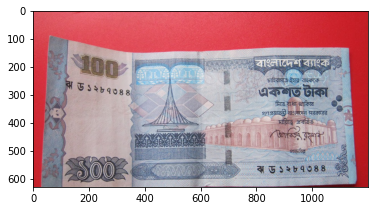

In [ ]:
# Prediction Function
file = 'test2.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(160, 160))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = obj_model.predict(x)
maxVal_Index = np.argmax(custom)

a=obj_analysis(maxVal_Index)

x = np.array(x, 'float32')
x = x.reshape([160, 480]);

plt.imshow(true_image)
plt.show()

In [ ]:
# Voice output
sound_file = 'voice_output2.wav'
Audio(sound_file, autoplay=True)

# Test 3

500 Taka


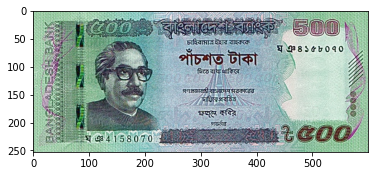

In [ ]:
# Prediction Function
file = 'test3.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(160, 160))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = obj_model.predict(x)
maxVal_Index = np.argmax(custom)

a=obj_analysis(maxVal_Index)

x = np.array(x, 'float32')
x = x.reshape([160, 480]);

plt.imshow(true_image)
plt.show()

In [ ]:
# Voice output
sound_file = 'voice_output3.wav'
Audio(sound_file, autoplay=True)

# Test 4

1000 Taka


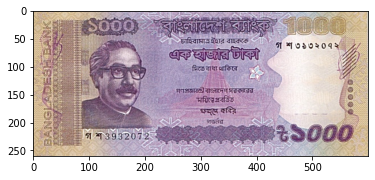

In [ ]:
# Prediction Function
file = 'test4.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(160, 160))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = obj_model.predict(x)
maxVal_Index = np.argmax(custom)

a=obj_analysis(maxVal_Index)

x = np.array(x, 'float32')
x = x.reshape([160, 480]);

plt.imshow(true_image)
plt.show()

In [ ]:
# Voice output
sound_file = 'voice_output4.wav'
Audio(sound_file, autoplay=True)

# Test 5

50 Taka


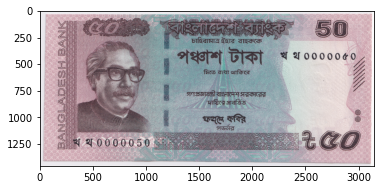

In [ ]:
# Prediction Function
file = 'test5.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(160, 160))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = obj_model.predict(x)
maxVal_Index = np.argmax(custom)

a=obj_analysis(maxVal_Index)

x = np.array(x, 'float32')
x = x.reshape([160, 480]);

plt.imshow(true_image)
plt.show()

In [ ]:
# Voice output
sound_file = 'voice_output5.wav'
Audio(sound_file, autoplay=True)

**`VGG-16`**

---



```
# This is formatted as code
```



In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd

In [ ]:
image_size = [224, 224]

In [ ]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
from glob import glob
folders = glob('/content/drive/MyDrive/thesis_dataset_all/training_set/*')

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs = prediction)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set = train_data_gen.flow_from_directory('/content/drive/MyDrive/thesis_dataset_all/training_set', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 594 images belonging to 6 classes.


In [ ]:
test_set = test_data_gen.flow_from_directory('/content/drive/MyDrive/thesis_dataset_all/test_set', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 213 images belonging to 6 classes.


Text(0.5, 1.0, 'Bacterial Spot')

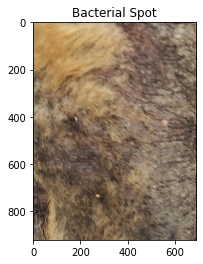

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/thesis_dataset_all/training_set/dog ringworm/dog (1).JPG"))
plt.title("Bacterial Spot")

In [ ]:
mod = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
19/19 [==============================] - 32s 1s/step - loss: 1.4778 - accuracy: 0.6027 - val_loss: 1.9745 - val_accuracy: 0.5728
Epoch 2/20
19/19 [==============================] - 23s 1s/step - loss: 0.7045 - accuracy: 0.7576 - val_loss: 1.3617 - val_accuracy: 0.5822
Epoch 3/20
19/19 [==============================] - 24s 1s/step - loss: 0.4290 - accuracy: 0.8502 - val_loss: 1.3209 - val_accuracy: 0.6385
Epoch 4/20
19/19 [==============================] - 22s 1s/step - loss: 0.3265 - accuracy: 0.9108 - val_loss: 1.3078 - val_accuracy: 0.6573
Epoch 5/20
19/19 [==============================] - 24s 1s/step - loss: 0.2590 - accuracy: 0.9209 - val_loss: 1.4328 - val_accuracy: 0.6432
Epoch 6/20
19/19 [==============================] - 24s 1s/step - loss: 0.2084 - accuracy: 0.9411 - val_loss: 1.4943 - val_accuracy: 0.6150
Epoch 7/20
19/19 [==============================] - 22s 1s/step - loss: 0.1791 - accuracy: 0.9428 - val_loss: 1.3246 - val_accuracy: 0.6761
Epoch 8/20
19/19 [==

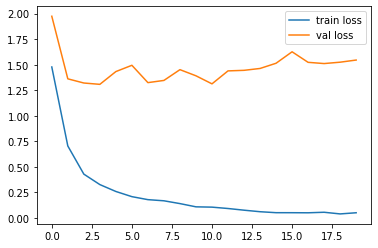

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

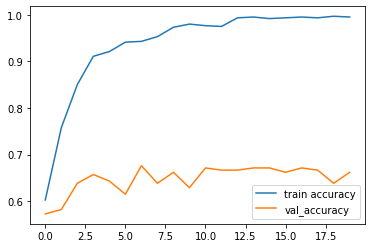

In [ ]:
plt.plot(mod.history['accuracy'], label='train accuracy')
plt.plot(mod.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('modelvgg.h5')